## This notebook has been adapted from Google's Tensorflow examples

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


In [2]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [12]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four',
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [ ]:
# Test this if you want to check for Fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

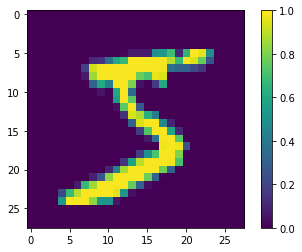

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1623 - accuracy: 0.7250
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4823 - accuracy: 0.8758
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3790 - accuracy: 0.8961
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3390 - accuracy: 0.9042
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3159 - accuracy: 0.9101
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2996 - accuracy: 0.9142
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2865 - accuracy: 0.9178
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2754 - accuracy: 0.9207
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2652 - accuracy: 0.9235
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.255

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2478 - accuracy: 0.9280 - 533ms/epoch - 2ms/step

Test accuracy: 0.9279999732971191


In [20]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [21]:
predictions = probability_model.predict(test_images)

In [22]:
predictions[0]

array([8.7204615e-05, 1.2027476e-08, 8.3725841e-05, 2.1498248e-03,
       1.6404459e-07, 1.0133852e-04, 8.6171492e-10, 9.9672514e-01,
       1.5508151e-05, 8.3709561e-04], dtype=float32)

In [23]:
np.argmax(predictions[0])

7

In [24]:
test_labels[0]

7

In [25]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

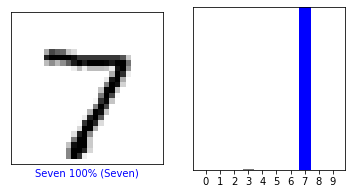

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

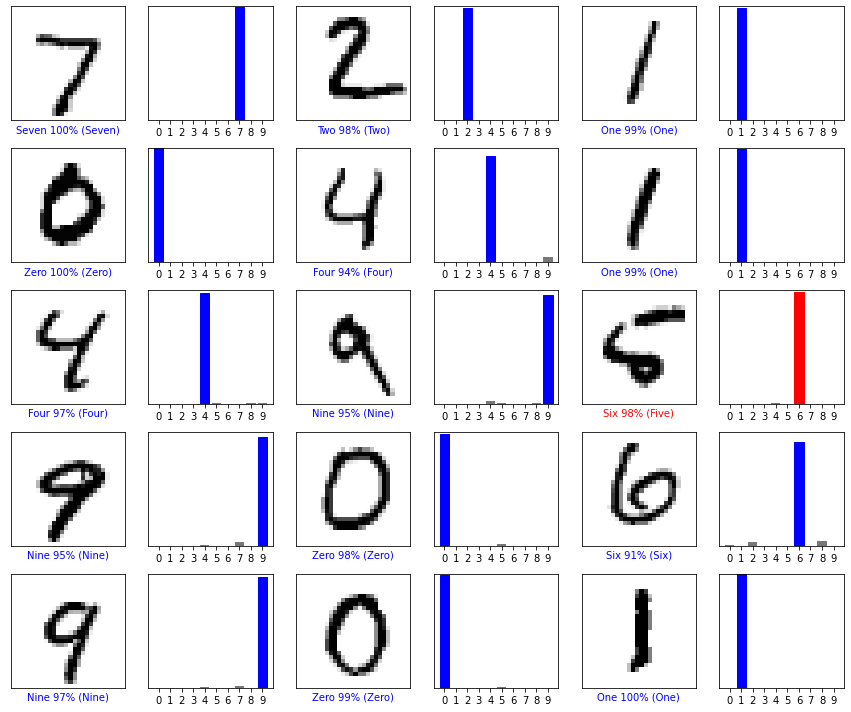

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [35]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [36]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [37]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.1668738e-03 9.5915575e-06 9.8393708e-01 5.5912524e-03 1.3879657e-11
  2.9726936e-03 4.8177964e-03 7.2696974e-12 5.0468312e-04 1.3486723e-10]]


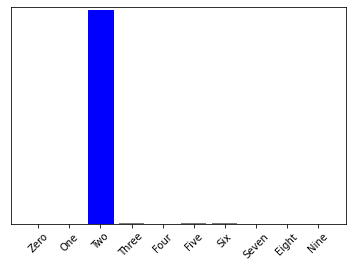

In [38]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [39]:
np.argmax(predictions_single[0])

2